## scipy.opmimize.curve_fit example
https://www.youtube.com/watch?v=peBOquJ3fDo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as o

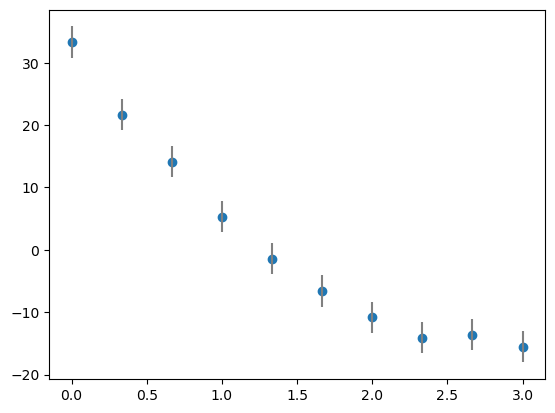

In [69]:
relevance_of_d = 1e-4
def model_f(x, a, b, c, d):
    return a*(x-b)**2 + c + d*relevance_of_d*np.cos(x)

random_faktor = 5
x_data = np.linspace(0, 3, 10)
y_data = model_f(x_data, 5, 3, -16.5, 1) + random_faktor*np.random.rand((len(x_data)))

plt.scatter(x_data, y_data)
#y_err = np.sqrt(np.clip(x_data, 1e-12, None))
y_err = random_faktor/2
plt.errorbar(x_data, y_data, y_err, ls='', color='grey')
plt.show()

[    5.81793003     2.89134802   -15.34554129 -2141.8637504 ]


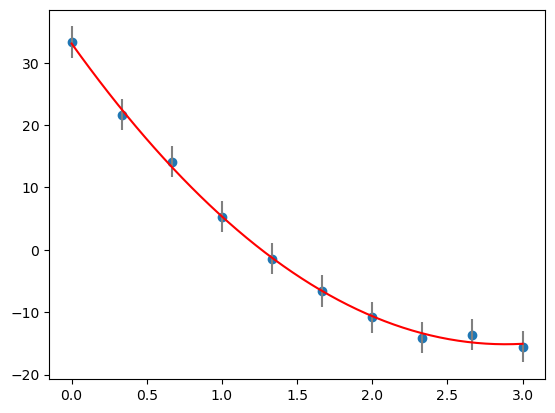

In [70]:
popt, pcov = o.curve_fit(model_f, x_data, y_data, p0=[3, 2, -16, 1])
print(popt)

x_model = np.linspace(min(x_data), max(x_data))
y_model = model_f(x_model, *popt)

plt.scatter(x_data, y_data)
plt.errorbar(x_data, y_data, y_err, ls='', color='grey')
plt.plot(x_model, y_model, color='r')
plt.show()

cond(pcov) = 4585875133035.622


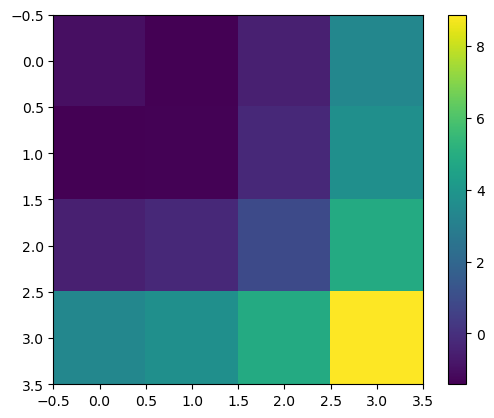

In [71]:
#print(pcov)
#print(np.diag(pcov))
print("cond(pcov) =", np.linalg.cond(pcov))
plt.imshow(np.log10(np.clip(np.abs(pcov), 1e-12, None)))
plt.colorbar()
plt.show()